# 1.2 Bitcoin

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
bitcoin = Table.read_table('http://faculty.ung.edu/rsinn/bitcoin.csv')
bitcoin.num_rows

1236

In [3]:
bitcoin

Date,Symbol,Open,High,Low,Close
5/26/2017,BTCUSD,2524.99,2650,2059.84,2263.65
5/27/2017,BTCUSD,2263.65,2347,1899.45,2086.56
5/28/2017,BTCUSD,2086.56,2325,2086.56,2227.56
5/29/2017,BTCUSD,2227.56,2381.07,2145.87,2305
5/30/2017,BTCUSD,2305,2345,2151.25,2203.58
5/31/2017,BTCUSD,2203.58,2332.88,2176.5,2305.16
6/1/2017,BTCUSD,2305.16,2470.47,2305.16,2414.11
6/2/2017,BTCUSD,2414.11,2474.16,2381.05,2474.16
6/3/2017,BTCUSD,2474.16,2584.21,2450,2546.44
6/4/2017,BTCUSD,2546.44,2564.33,2479.32,2534.13


## Investment Analysis

Suppose you were to buy $100 of bitcoin, hold for exactly 90 days, then sell it. How often would you have made money over the last four years?

In [4]:
dates = bitcoin.column('Date')
purchase = dates.take(np.arange(bitcoin.num_rows - 90))
sell = dates.take(np.arange(90, bitcoin.num_rows))

In [5]:
closing_price = bitcoin.column('Close')
purchase_price = closing_price.take(np.arange(bitcoin.num_rows - 90))
sell_price = closing_price.take(np.arange(90, bitcoin.num_rows))

In [6]:
invest = Table().with_columns(
    'Day', np.arange(bitcoin.num_rows - 90),
    'Purchase', purchase,
    'Bought', purchase_price,
    'Sell', sell,
    'Sold', sell_price,
    'Gain', (sell_price - purchase_price ) / sell_price * 100 )

In [7]:
invest

Day,Purchase,Bought,Sell,Sold,Gain
0,5/26/2017,2263.65,8/24/2017,4312.44,47.5088
1,5/27/2017,2086.56,8/25/2017,4356.32,52.1027
2,5/28/2017,2227.56,8/26/2017,4340.94,48.6848
3,5/29/2017,2305,8/27/2017,4315.74,46.5909
4,5/30/2017,2203.58,8/28/2017,4385,49.7473
5,5/31/2017,2305.16,8/29/2017,4589.06,49.7684
6,6/1/2017,2414.11,8/30/2017,4577.26,47.2586
7,6/2/2017,2474.16,8/31/2017,4732.24,47.7169
8,6/3/2017,2546.44,9/1/2017,4927.29,48.3197
9,6/4/2017,2534.13,9/2/2017,4606.29,44.9854


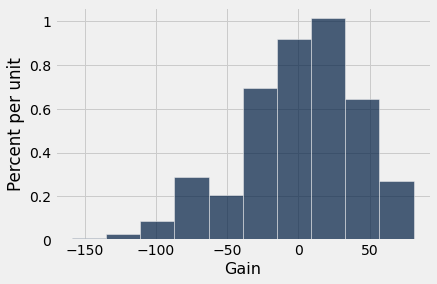

In [8]:
invest.hist('Gain')

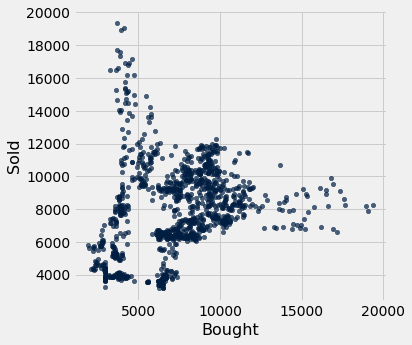

In [9]:
invest.scatter('Bought', 'Sold')

Notice in the above scatter plot that the diagonal line from bottom-left to top-right would represent the break-even trades.

In [10]:
max(invest.column('Gain'))

80.9149409777988

In [11]:
min(invest.column('Gain'))

-159.12475695666691

In [12]:
invest.bin('Gain', bins = np.arange(-160,100,10))

bin,Gain count
-160,1
-150,2
-140,3
-130,1
-120,4
-110,9
-100,8
-90,31
-80,41
-70,18


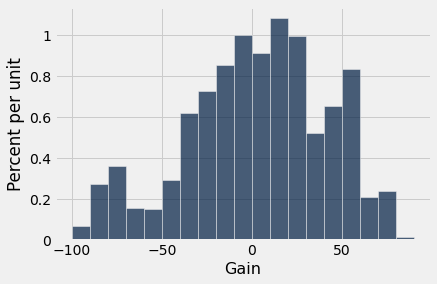

In [13]:
invest.hist('Gain', bins = np.arange(-100,100,10))

## Plot Price 1 vs. Price 2

If we create a table with ONLY numeric columns, then the .plot method will create multiple line plots. We specify the x-axis variable, and all others get 

When yellow (Price 2) is higher, the investor is winning. When blue is higher, the investor is losing.

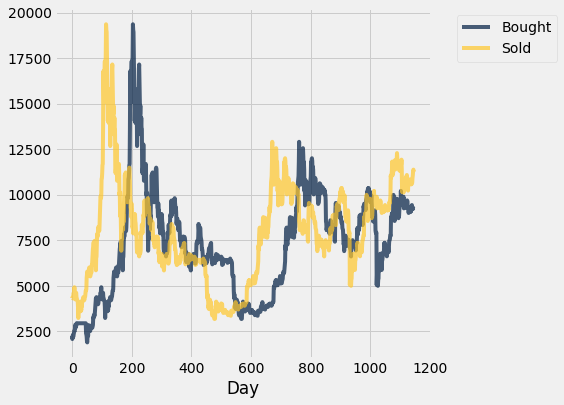

In [14]:
price_diff = invest.select('Day', 'Bought', 'Sold')
price_diff.plot('Day')